이번 튜토리얼에서는 

1. PyTorch에 **내장(Built-in) 데이터셋**을 로드하는 방법과 
2. **로컬 드라이브에 저장**되어 있는 데이터셋을 로드하여 이미지 데이터셋을 구성하는 방법

에 대하여 알아보겠습니다.

**[참고]**
- `torchvision.transform`을 활용한 이미지 정규화는 [링크](https://teddylee777.github.io/pytorch/torchvision-transform)에서 확인해 주시기 바랍니다.

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms

## Case 1. 내장(built-in) 데이터셋 로드

- `torchvision.datasets` 에서 데이터 로드
- 아래 링크에서 built-in datasets의 목록을 확인해 볼 수 있습니다.
  - [PyTorch Built-in Datsets](https://pytorch.org/vision/stable/datasets.html)

### STEP 1) Image Transform 정의

In [2]:
# Image Transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
])

### STEP 2) 내장 데이터셋 로드 

- `FashionMNIST` 데이터셋 로드하는 예제

-  `root`: 데이터셋을 다운로드 받을 경로(폴더) 지정.
- `train`: `True`로 설정된 경우 `train` 데이터셋에서 로드하며, `False`인 경우 `test` 데이터셋에서 로드
- `download`: `True`로 설정된 경우, 인터넷으로부터 데이터셋을 다운로드 받아 지정된 `root` 디렉토리에 다운로드
- `transform`: 이미지 `transform` 적용

In [3]:
# train(학습용) 데이터셋 로드
train = datasets.FashionMNIST(root='data', 
                              train=True,         # set True
                              download=True,      # 다운로드
                              transform=transform # transform 적용. (0~1 로 정규화)
                             )

In [4]:
# test(학습용) 데이터셋 로드
test = datasets.FashionMNIST(root='data', 
                             train=False,       # set to False
                             download=True,     # 다운로드
                             transform=transform # transform 적용. (0~1 로 정규화)
                            )

`FashionMNIST` 데이터셋 시각화

- 총 10개의 카테고리로 구성되어 있으며, `Label`은 아래 코드에서 `labels_map`에 정의되어 있습니다.
- 출처: [zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

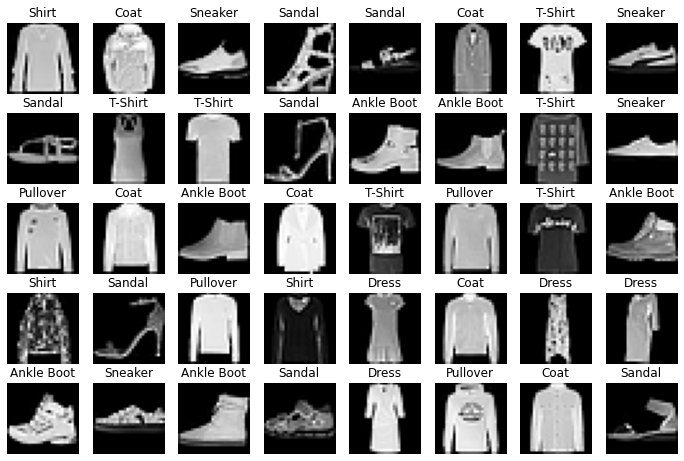

In [5]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train), size=(1,)).item()
    img, label = train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)), cmap='gray')
plt.show()

### STEP 3) torch.utils.data.DataLoader로 데이터셋 로더 구성

In [6]:
batch_size = 32 # batch_size 지정
num_workers = 8 # Thread 숫자 지정 (병렬 처리에 활용할 쓰레드 숫자 지정)

In [7]:
train_loader = torch.utils.data.DataLoader(train, 
                                           batch_size=batch_size,
                                           shuffle=True, 
                                           num_workers=num_workers)

In [8]:
test_loader = torch.utils.data.DataLoader(test, 
                                          batch_size=batch_size,
                                          shuffle=False, 
                                          num_workers=num_workers)

## Case 2. 로컬 디렉토리에서 Image를 로드

튜토리얼 진행을 위한 데이터셋 다운로드
- `images` 폴더에 `rps` 데이터셋 다운로드

In [9]:
# 이미지 데이터셋 다운로드
import urllib.request
import zipfile
import glob

url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('images/')
zip_ref.close()

print(glob.glob('images/rps/*'))

['images/rps/rock', 'images/rps/paper', 'images/rps/scissors']


다운로드 받은 이미지는 `images`폴더 하위에 `rps` 폴더에 `rock`, `paper`, `scissors` 폴더가 생성되었으며, 각각의 폴더 밑에 가위/바위/보자기 사진 파일이 위치해 있습니다.

In [10]:
# rock 폴더 하위에 위치한 .png 파일 10개 출력
glob.glob('images/rps/rock/*')[:10]

['images/rps/rock/rock03-027.png',
 'images/rps/rock/rock06ck02-063.png',
 'images/rps/rock/rock05ck01-024.png',
 'images/rps/rock/rock05ck01-010.png',
 'images/rps/rock/rock06ck02-065.png',
 'images/rps/rock/rock06ck02-051.png',
 'images/rps/rock/rock03-050.png',
 'images/rps/rock/rock03-097.png',
 'images/rps/rock/rock05ck01-041.png',
 'images/rps/rock/rock07-k03-043.png']

현재 `root` 디렉토리는 `images/rps` 폴더가 `root` 디렉토리입니다.

간단히 도식화 해보면 다음과 같습니다.

- `images/rps`
  - `rock` 폴더
  - `paper` 폴더
  - `scissor` 폴더

In [11]:
image_folder = datasets.ImageFolder(root='images/rps', 
                                    transform=transforms.Compose([
                                        transforms.ToTensor(), 
                                    ])
                                   )

`image_folder` 변수에 `class_to_idx` 속성 값을 확인해보면 class에 맵핑되는 label을 확인할 수 있습니다.

In [22]:
# class to index 라벨값 확인 (추후 시각화에 활용)
image_folder.class_to_idx

{'paper': 0, 'rock': 1, 'scissors': 2}

In [13]:
train_loader = torch.utils.data.DataLoader(image_folder,         # image_folder를 지정
                                           batch_size=batch_size,# 배치사이즈 지정
                                           shuffle=True,        # shuffle 여부 지정
                                           num_workers=8)       # num_workers 지정

In [14]:
test_loader = torch.utils.data.DataLoader(image_folder,          # 원래는 별도의 Validation Set의 root 경로를 지정해야 한다. 
                                          batch_size=batch_size, # 배치사이즈 지정
                                          shuffle=False,        # shuffle 여부 지정
                                          num_workers=8)         # num_workers 지정

1개의 배치(Batch)를 가져와서 shape를 확인하고, 시각화를 해봅니다.

In [16]:
# 1개 batch 추출
images, labels = next(iter(train_loader))

In [18]:
# images, labels에 각각 32개의 batch가 로드되어 있습니다.
# images는 300 X 300 사이즈 RGB 이미지 32장이 1개 batch로 구성되어 있습니다.
images.shape, labels.shape

(torch.Size([32, 3, 300, 300]), torch.Size([32]))

`RPS` 데이터셋을 시각화 합니다.

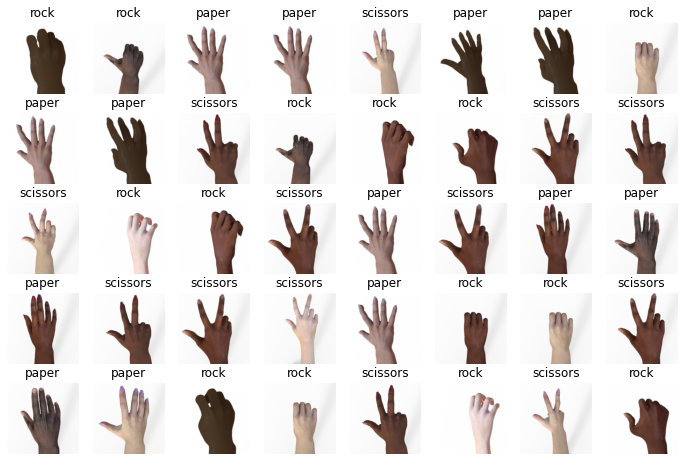

In [25]:
# ImageFolder의 속성 값인 class_to_idx를 할당
labels_map = {v:k for k, v in image_folder.class_to_idx.items()}

figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)))
plt.show()